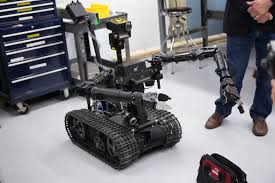

## Use Pandas to manipulate dataframes

### Load a csv or xlsx file

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('file.csv', sep = ',')

In [ ]:
df = pd.read_excel('file.xlsx')

### Get some basic stats on a file

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.describe()

### Filter on certain columns

Get the dataframe columns

In [ ]:
cols = df.columns

Filter the dataset on some columns

In [ ]:
# Choose columns to filter on
import numpy as np
choosed_cols = np.random.choice(cols, size = 10)
choosed_cols

In [ ]:
df_rest = df[choosed_cols].copy()
df_rest.head()

Filter based on a statistic computed on the columns

In [ ]:
# ex : mean >= 1
df_rest = df[cols[df[cols].mean()>=1]]
df_rest.head()

Filter on some rows

In [ ]:
# ex : all values where col_0 is above 0.5
df_rest = df.loc[df['col_0']>=0.5]
df_rest.head()

## Use matplotlib

In [ ]:
import matplotlib.pyplot as plt

### Basic drawing

Get a basic plot

In [ ]:
plt.plot(df['col_0'])

Add an X axis

In [ ]:
plt.plot(list(range(df.shape[0])), df['col_0'])

Change the size of the plot

In [ ]:
plt.figure(figsize = (25, 15))
plt.plot(df['col_0'])

Make a scatter plot

In [ ]:
plt.scatter(df['col_0'], df['col_1'])

Make a scatter plot with custom dot size and colors

In [ ]:
plt.scatter(df['col_0'], df['col_1'], s = df['dot_size'], c = df['dot_size'])

Plot an histogram

In [ ]:
a = plt.hist(df['col_0'])

Plot an histogram with custom number of bins

In [ ]:
a = plt.hist(df['col_0'], bins = 20)

### Other graphs
Plt include many possible transformation and visualization, including image processing, sound visualization and many other check the doc at :
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html

## Basics of sklearn

Sklearn is a standardized machine learning library designed to provide highly optimized machine learning models with a consistent syntaxe

The first step when using a sklearn model is to initialize the model, with a set of hyperparameters that depends on the model.
Check the doc to know what hyperparameters must be used. In the case of linear regression, the hyperparameter to choose is whether or not you want to fit the intercept

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept = True)

Then the model can be fitted on some data with clf.fit(X, y), this methods support both numpy arrays and dataframe

In [ ]:
clf.fit(df[df.columns[1:]], df['dot_size'])

Once fitted, you can make predictions with the model

In [ ]:
pred = clf.predict(df[df.columns[1:]])

In [ ]:
a = plt.hist(pred)

In [ ]:
plt.scatter(df['dot_size'], pred)

Each models in sklearn have several methods building to get several informations. For example in linear regression you can get
the coefficient and intercepts of the models

In [ ]:
clf.coef_

you can even check the coef for each variable

In [ ]:
list(zip(df.columns[1:], clf.coef_))

Each model have a different built in attributes. To know the specificities, either check the doc, or call dir on the model

In [ ]:
dir(clf)

You can try this with any model from sklearn, this include:

    - Linear models : linear regression, lasso, perceptron, LDA ...
    - tree based models : random forest, decision trees
    - nearest neighbors : knn, 
    - algebric models : svm, regularized svm, kernel tricks
    - Bayesian models : naive bayes, gaussian NB
    - gaussian process : GBR, gaussian mixture models
    - clustering : kmeans, DBScan
    - dimensionnality reductions : pca, feature agglomeration
        
For more, check the doc : https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

## Use Scipy for data manipulation and statistics computations

Scipy allows for both manipulation and processing of many files format

Let's try it to display an image

In [ ]:
import scipy
from scipy import misc
import matplotlib.pyplot as plt

face = misc.face()
plt.imshow(face)
plt.show()

Now, let's load a matlab file

In [ ]:
from scipy import io as sio
array = np.ones((4, 4))
sio.savemat('example.mat', {'ar': array}) 
data = sio.loadmat(‘example.mat', struct_as_record=True)
data['ar']

A sound file? No problem

In [ ]:
from scipy.io.mp3file import read, write
samplerate, data = read('file.mp3')

Finally there is many function to get some usefull statistic and transformations on your data

In [ ]:
scipy.mean(df['col_0'])

for more operations with scipy, check the doc at https://docs.scipy.org/doc/scipy/reference/

## To analyze maps

Use: https://geojson.io/#map=2/20.0/0.0

## To analyze text
#### (and the stop words)

In [1]:
from nltk.corpus import stopwords